# Pipeline to run the cotranslational folding code

This is the pipeline to run the code from: https://www.pnas.org/content/114/43/11434

First we need to decide which protein to try: In this case we try: 1A3W. So we get the fasta sequence from the PDB repository:

https://www.rcsb.org/fasta/entry/1M9H/display

>1M9H_1|Chain A|2,5-diketo-D-gluconic acid reductase A|Corynebacterium sp. (1720)
MTVPSIVLNDGNSIPQLGYGVYKVPPADTQRAVEEALEVGYRHIDTAAIYGNEEGVGAAIAASGIARDDLFITTKLWNDRHDGDEPAAAIAESLAKLALDQVDLYLVHWPTPAADNYVHAWEKMIELRAAGLTRSIGVSNHLVPHLERIVAATGVVPAVNQIELHPAYQQREITDWAAAHDVKIESWGPLGQGKYDLFGAEPVTAAAAAHGKTPAQAVLRWHLQKGFVVFPGSVRREHLEENLDVFDFDLTDTEIAAIDAMDPGDGSGRVSGHPDEVD

We use it to run BLAST in expasy:

https://web.expasy.org/blast/

We get the first hit: 

https://www.uniprot.org/uniprot/P06632

We look for cross reference databases: 

Cross-references
Sequence databases
Select the link destinations, then we click here: 

M12799 Genomic DNA Translation: AAA83534.1

We get redirected here: https://www.ebi.ac.uk/ena/data/view/AAA83534

And from there we get the fasta sequence: AAA83534.fasta

We get it into our directory. Afterwards we get the PDB file in gunzip format (on the download part of the page): 

https://www.rcsb.org/structure/1M9H

We download it in the same folder were we have the python script. Check next cell the contents of the folder



In [1]:
%ls

1m9h/                                   calc_consensus_contacts.py
1m9h.pdb.gz                             calc_elongation.py
1w0m-test/                              calc_profile_comparison.py
1yxm-test/                              calc_rare_enrichment.py
2tps-test/                              codons.py
AAA83534.fasta                          fe.py
AAA83534_elongation_profile copy.txt    hemk/
AAA83534_elongation_profile.dat         parse-columns.py
Cotranslational folding pipeline.ipynb  polymer.dat
README                                  polymer.py
__pycache__/                            polymer_abs_energies.dat
calc_absolute_energies.py               substructures.py
calc_codon_usage.py


In [2]:
%run calc_consensus_contacts.py AAA83534.fasta 1m9h

@> 2301 atoms and 1 coordinate set(s) were parsed in 0.05s.


Found 1 chains.
1m9h  98.20
Using 1 chains with percentid >= 95.
Number of residues: 278
Minimum consensus fraction: 0.25
Total bond energy: 249.234375
Writing polymer.dat


In [3]:
%run calc_absolute_energies.py polymer.dat

# Polymer: polymer.dat
# mu = -2.0
# ndim = 3.0
# kuhnlength = 2.0
# dFdN = -0.075
# dF = -20.849999999999998
# Number of residues: 278
# Number of contacts: 688
Writing polymer_abs_energies.dat


In [4]:
%run calc_elongation.py AAA83534 polymer_abs_energies.dat

# nresidues = 278
# Writing AAA83534_elongation_profile.dat


In [5]:
%ls

1m9h/                                   calc_consensus_contacts.py
1m9h.pdb.gz                             calc_elongation.py
1w0m-test/                              calc_profile_comparison.py
1yxm-test/                              calc_rare_enrichment.py
2tps-test/                              codons.py
AAA83534.fasta                          fe.py
AAA83534_elongation_profile copy.txt    hemk/
AAA83534_elongation_profile.dat         parse-columns.py
Cotranslational folding pipeline.ipynb  polymer.dat
README                                  polymer.py
__pycache__/                            polymer_abs_energies.dat
calc_absolute_energies.py               substructures.py
calc_codon_usage.py


From here we use a script to parse the important columns from the file: AAA83534_elongation_profile.dat The important columns are the number of residue header (#) and F_L and we plot them. According to the publication we can estimate the presence of an intermediate in thevecinity of 150 aa. 

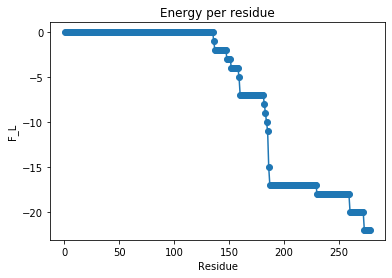

In [30]:
%run parse-columns.py